# Distributed Memory Analysis

In the following notebook a fast analysis of performance metrics of distributed
memory version.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import distributed_memory_plot as plot

df = pd.read_csv("../results/forest.csv")
df = df[(df["backend"] == "mpi") | (df["backend"] == "omp")]
df = df[(df["threads"] >= 8)]
df = df[(df["nodes"] == 1) | (df["nodes"] == 2) | (df["nodes"] == 4) | (df["nodes"] == 8)]
df = df[(df["dataset"] == "susy100000") | (df["dataset"] == "susy20000")]
df = df[df["estimators"] == 256]
df = df.drop(columns=["accuracy", "f1"])
df

,dataset,estimators,max_depth,backend,nodes,threads,train_time,predict_time
2403,susy20000,256.0,0.0,omp,1.0,8.0,14143.00,16.89770
2404,susy20000,256.0,0.0,omp,1.0,16.0,7102.88,8.98956
2405,susy20000,256.0,0.0,omp,1.0,32.0,5077.29,6.92693
2781,susy20000,256.0,0.0,mpi,2.0,8.0,7099.21,20.61910
2782,susy20000,256.0,0.0,mpi,2.0,8.0,7087.52,31.59850
...,...,...,...,...,...,...,...,...
3436,susy100000,256.0,0.0,mpi,8.0,32.0,4883.18,58.06280
3437,susy100000,256.0,0.0,mpi,8.0,32.0,4852.22,89.27050
3438,susy100000,256.0,0.0,mpi,8.0,32.0,4885.57,13.51470
3439,susy100000,256.0,0.0,mpi,8.0,32.0,4881.74,48.20670


Every simulation is replicated 5 times so is necessary to average the results.

In [2]:
INPUT_COLS = ["dataset", "estimators", "max_depth", "backend", "nodes", "threads"]
OUTPUT_COLS = ["train_time", "predict_time"]
df = df.groupby(by=INPUT_COLS, as_index=False)[OUTPUT_COLS].mean()
df = df.sort_values(by=["dataset", "nodes", "threads"])
df

,dataset,estimators,max_depth,backend,nodes,threads,train_time,predict_time
9,susy100000,256.0,0.0,omp,1.0,8.0,102300.0000,115.262000
10,susy100000,256.0,0.0,omp,1.0,16.0,51686.2000,79.389300
11,susy100000,256.0,0.0,omp,1.0,32.0,38286.0000,49.558900
0,susy100000,256.0,0.0,mpi,2.0,8.0,51353.2800,169.160160
1,susy100000,256.0,0.0,mpi,2.0,16.0,25987.7400,69.368200
2,susy100000,256.0,0.0,mpi,2.0,32.0,19241.3800,124.808200
3,susy100000,256.0,0.0,mpi,4.0,8.0,25762.9600,153.192660
4,susy100000,256.0,0.0,mpi,4.0,16.0,12994.8000,78.744180
5,susy100000,256.0,0.0,mpi,4.0,32.0,9651.0060,52.520360
6,susy100000,256.0,0.0,mpi,8.0,8.0,12891.8200,74.122700


## Execution Time

Below are reported the total execution time of each version on Magic and SUSY
datasets for both training and predict phases.

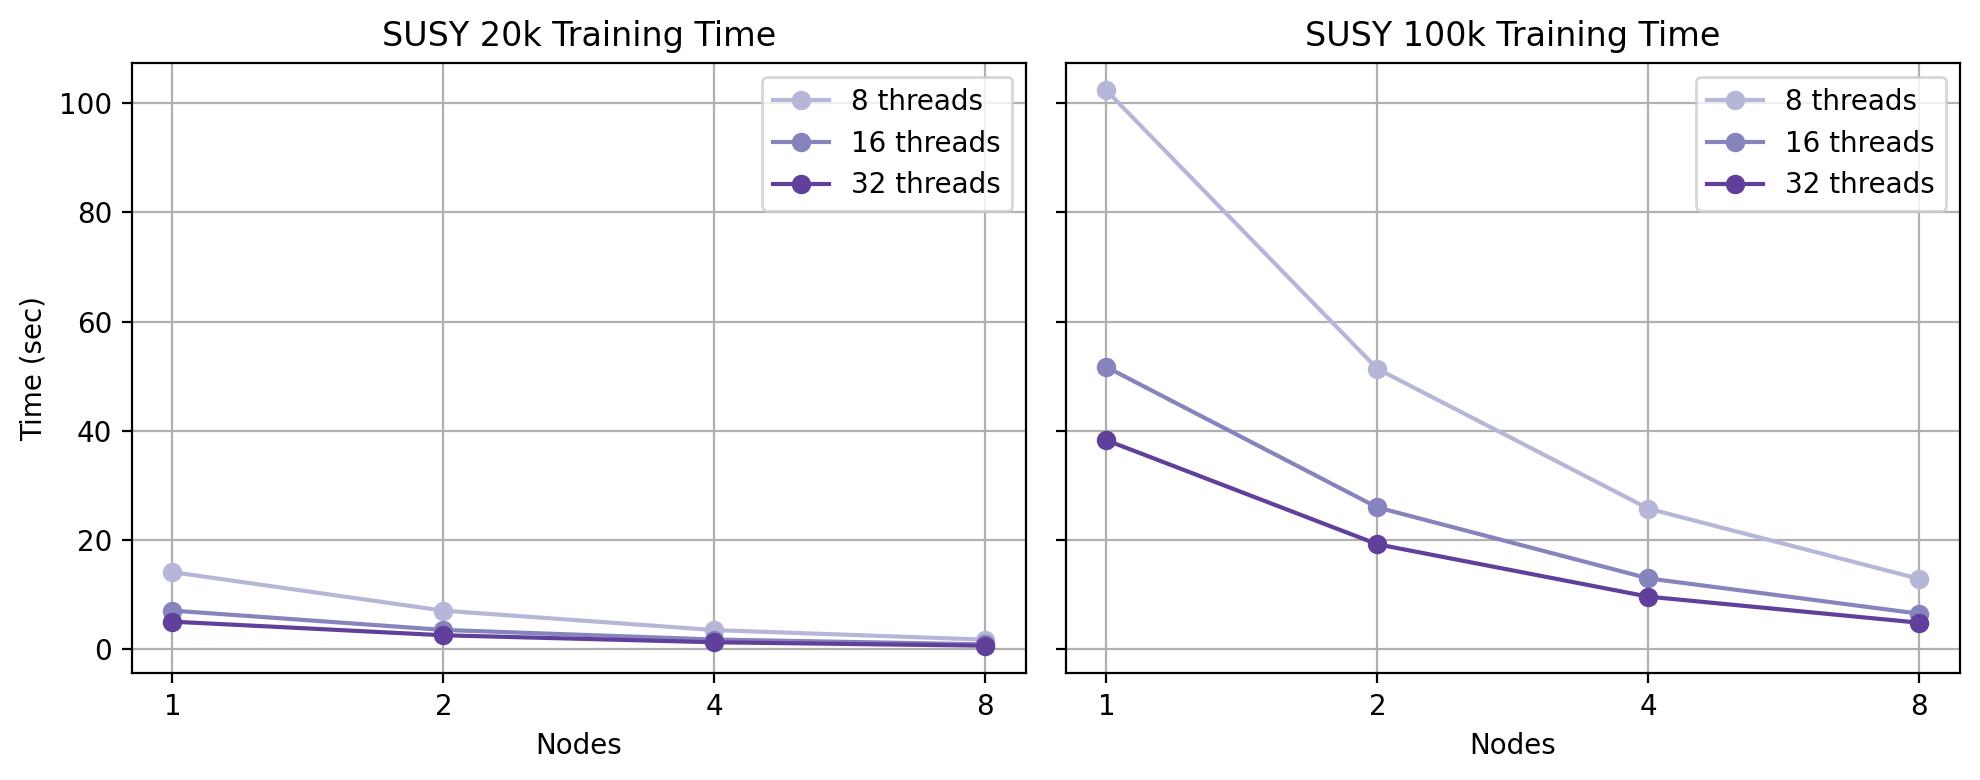

In [3]:
plot.training_runtime(df)

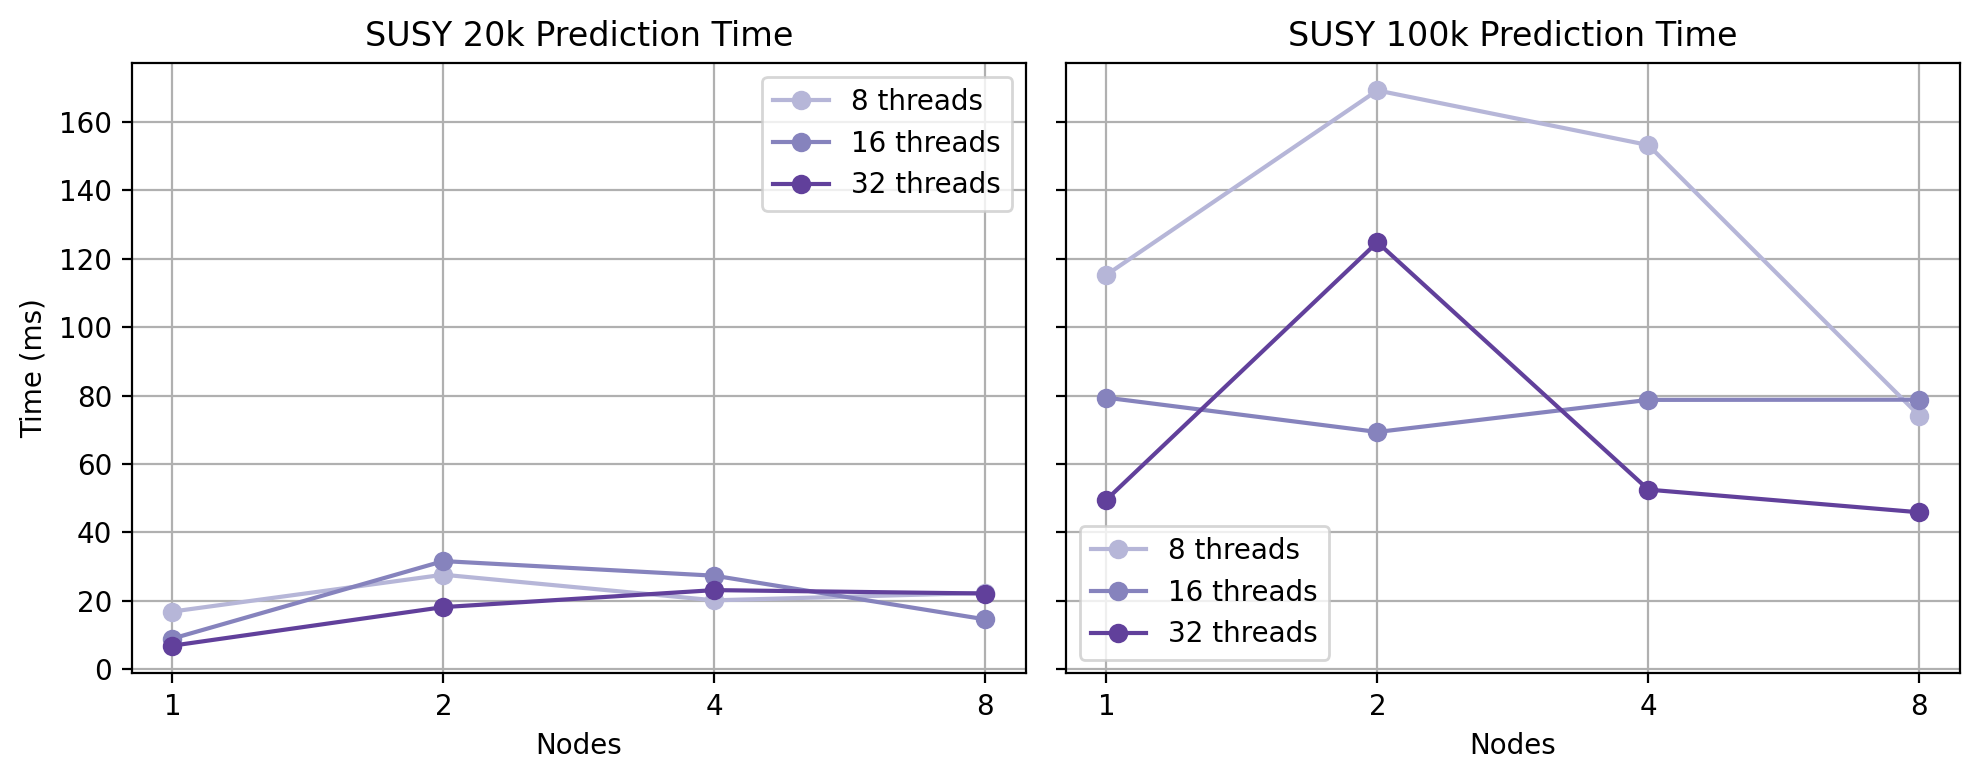

In [4]:
plot.prediction_runtime(df)

## Speedup

Speedup is computed with respect to the sequential version.

In [5]:
base = df[df["backend"] == "omp"]
other = df[df["backend"] == "mpi"]

In [6]:
merge_cols = [
    "dataset",
    "estimators",
    "max_depth",
    "threads",   # IMPORTANTISSIMO
]

su = other.merge(
    base,
    on=merge_cols,
    suffixes=("_mpi", "_omp"),
    how="inner"
)

su

,dataset,estimators,max_depth,backend_mpi,nodes_mpi,threads,train_time_mpi,predict_time_mpi,backend_omp,nodes_omp,train_time_omp,predict_time_omp
0,susy100000,256.0,0.0,mpi,2.0,8.0,51353.2800,169.160160,omp,1.0,102300.00,115.26200
1,susy100000,256.0,0.0,mpi,2.0,16.0,25987.7400,69.368200,omp,1.0,51686.20,79.38930
2,susy100000,256.0,0.0,mpi,2.0,32.0,19241.3800,124.808200,omp,1.0,38286.00,49.55890
3,susy100000,256.0,0.0,mpi,4.0,8.0,25762.9600,153.192660,omp,1.0,102300.00,115.26200
4,susy100000,256.0,0.0,mpi,4.0,16.0,12994.8000,78.744180,omp,1.0,51686.20,79.38930
5,susy100000,256.0,0.0,mpi,4.0,32.0,9651.0060,52.520360,omp,1.0,38286.00,49.55890
6,susy100000,256.0,0.0,mpi,8.0,8.0,12891.8200,74.122700,omp,1.0,102300.00,115.26200
7,susy100000,256.0,0.0,mpi,8.0,16.0,6532.5780,78.801000,omp,1.0,51686.20,79.38930
8,susy100000,256.0,0.0,mpi,8.0,32.0,4878.8120,45.898520,omp,1.0,38286.00,49.55890
9,susy20000,256.0,0.0,mpi,2.0,8.0,7090.2140,27.660120,omp,1.0,14143.00,16.89770


In [7]:
su["train_speedup"] = su["train_time_omp"] / su["train_time_mpi"]
su["predict_speedup"] = su["predict_time_omp"] / su["predict_time_mpi"]
su

,dataset,estimators,max_depth,backend_mpi,nodes_mpi,threads,train_time_mpi,predict_time_mpi,backend_omp,nodes_omp,train_time_omp,predict_time_omp,train_speedup,predict_speedup
0,susy100000,256.0,0.0,mpi,2.0,8.0,51353.2800,169.160160,omp,1.0,102300.00,115.26200,1.992083,0.681378
1,susy100000,256.0,0.0,mpi,2.0,16.0,25987.7400,69.368200,omp,1.0,51686.20,79.38930,1.988869,1.144462
2,susy100000,256.0,0.0,mpi,2.0,32.0,19241.3800,124.808200,omp,1.0,38286.00,49.55890,1.989774,0.397080
3,susy100000,256.0,0.0,mpi,4.0,8.0,25762.9600,153.192660,omp,1.0,102300.00,115.26200,3.970817,0.752399
4,susy100000,256.0,0.0,mpi,4.0,16.0,12994.8000,78.744180,omp,1.0,51686.20,79.38930,3.977453,1.008193
5,susy100000,256.0,0.0,mpi,4.0,32.0,9651.0060,52.520360,omp,1.0,38286.00,49.55890,3.967048,0.943613
6,susy100000,256.0,0.0,mpi,8.0,8.0,12891.8200,74.122700,omp,1.0,102300.00,115.26200,7.935264,1.555016
7,susy100000,256.0,0.0,mpi,8.0,16.0,6532.5780,78.801000,omp,1.0,51686.20,79.38930,7.912068,1.007466
8,susy100000,256.0,0.0,mpi,8.0,32.0,4878.8120,45.898520,omp,1.0,38286.00,49.55890,7.847402,1.079749
9,susy20000,256.0,0.0,mpi,2.0,8.0,7090.2140,27.660120,omp,1.0,14143.00,16.89770,1.994721,0.610905


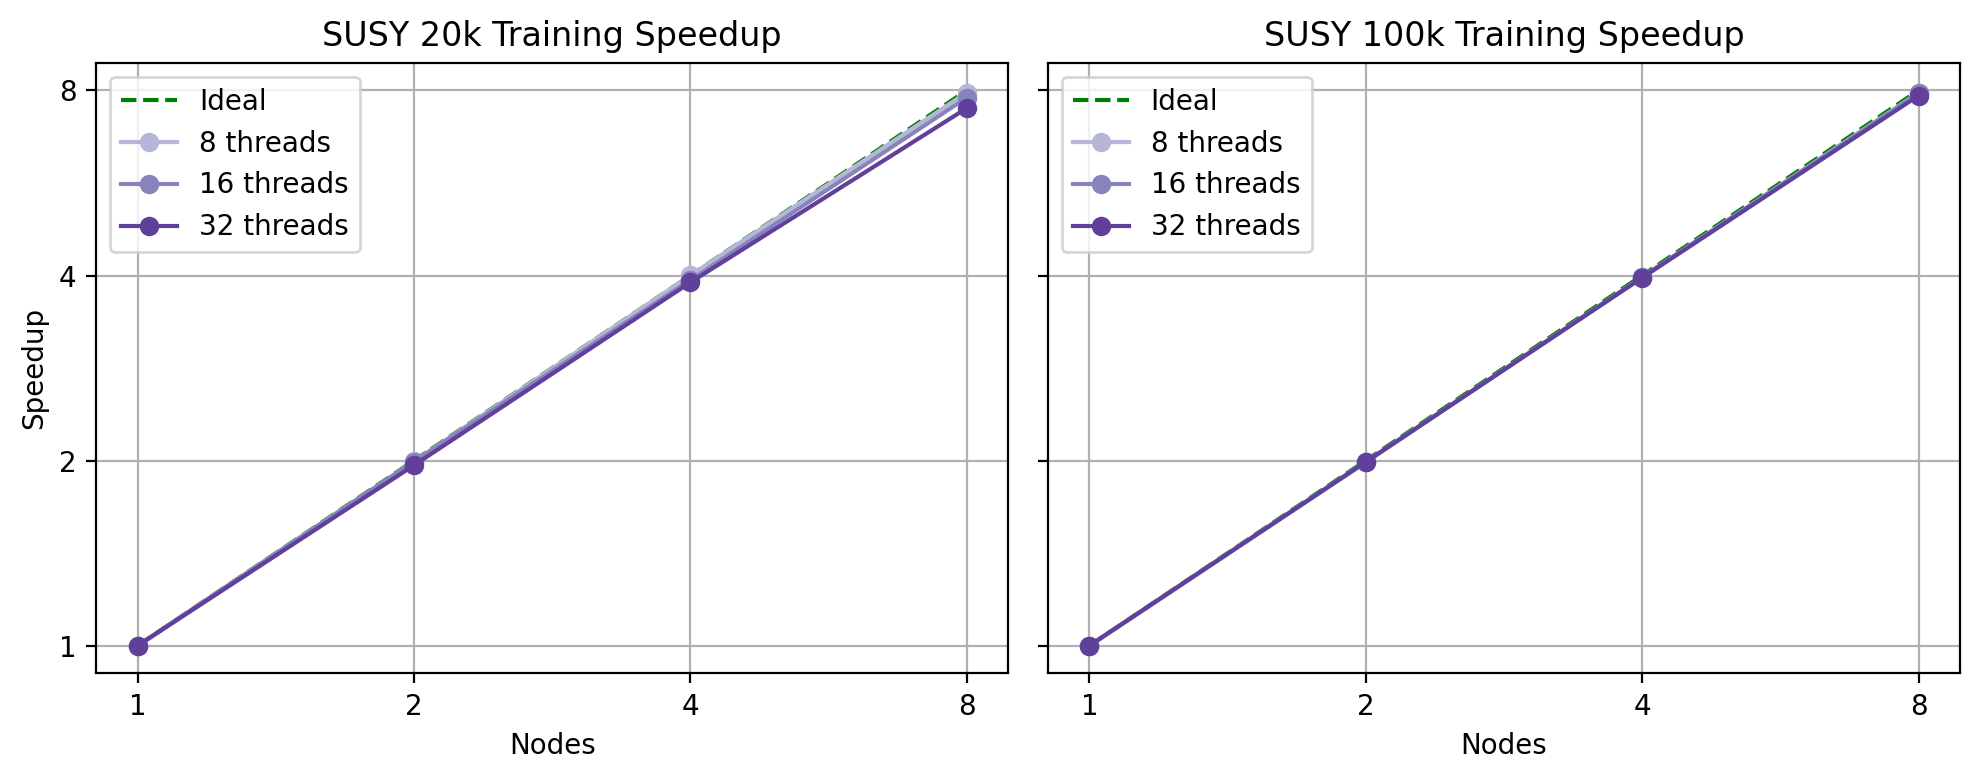

In [8]:
plot.training_speedup(su)

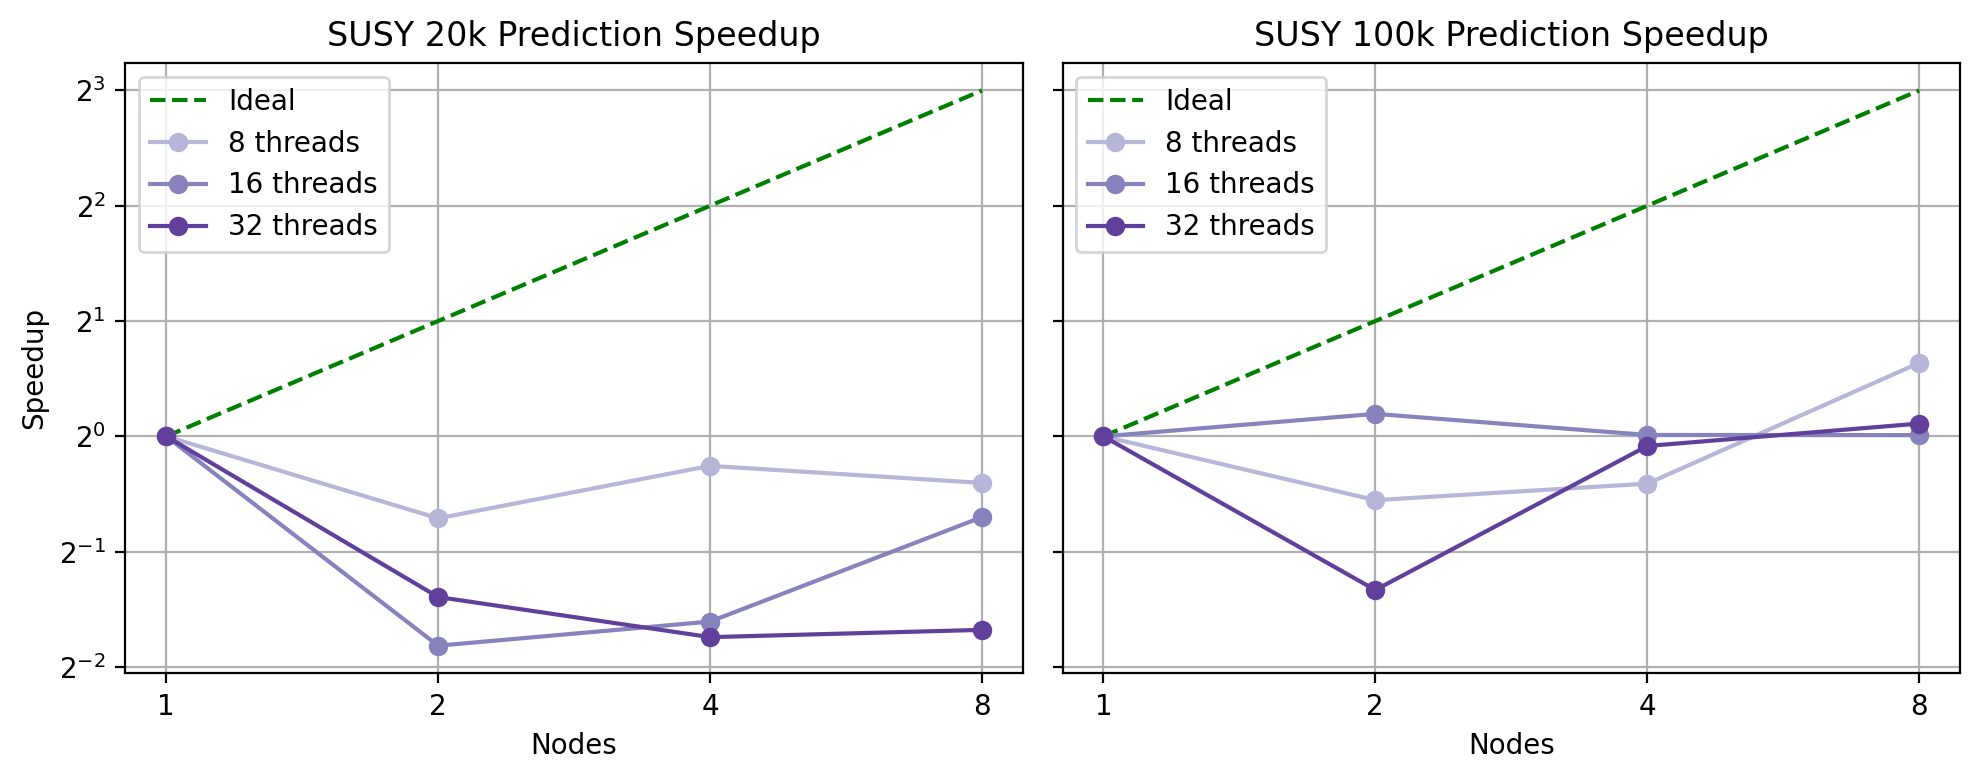

In [9]:
plot.prediction_speedup(su)

## Efficiency

Efficiency is computed based on the number of cores/threads used.

In [10]:
su["train_efficiency"] = su["train_speedup"] / su["nodes_mpi"]
su["predict_efficiency"] = su["predict_speedup"] / su["nodes_mpi"]
su

,dataset,estimators,max_depth,backend_mpi,nodes_mpi,threads,train_time_mpi,predict_time_mpi,backend_omp,nodes_omp,train_time_omp,predict_time_omp,train_speedup,predict_speedup,train_efficiency,predict_efficiency
0,susy100000,256.0,0.0,mpi,2.0,8.0,51353.2800,169.160160,omp,1.0,102300.00,115.26200,1.992083,0.681378,0.996042,0.340689
1,susy100000,256.0,0.0,mpi,2.0,16.0,25987.7400,69.368200,omp,1.0,51686.20,79.38930,1.988869,1.144462,0.994434,0.572231
2,susy100000,256.0,0.0,mpi,2.0,32.0,19241.3800,124.808200,omp,1.0,38286.00,49.55890,1.989774,0.397080,0.994887,0.198540
3,susy100000,256.0,0.0,mpi,4.0,8.0,25762.9600,153.192660,omp,1.0,102300.00,115.26200,3.970817,0.752399,0.992704,0.188100
4,susy100000,256.0,0.0,mpi,4.0,16.0,12994.8000,78.744180,omp,1.0,51686.20,79.38930,3.977453,1.008193,0.994363,0.252048
5,susy100000,256.0,0.0,mpi,4.0,32.0,9651.0060,52.520360,omp,1.0,38286.00,49.55890,3.967048,0.943613,0.991762,0.235903
6,susy100000,256.0,0.0,mpi,8.0,8.0,12891.8200,74.122700,omp,1.0,102300.00,115.26200,7.935264,1.555016,0.991908,0.194377
7,susy100000,256.0,0.0,mpi,8.0,16.0,6532.5780,78.801000,omp,1.0,51686.20,79.38930,7.912068,1.007466,0.989008,0.125933
8,susy100000,256.0,0.0,mpi,8.0,32.0,4878.8120,45.898520,omp,1.0,38286.00,49.55890,7.847402,1.079749,0.980925,0.134969
9,susy20000,256.0,0.0,mpi,2.0,8.0,7090.2140,27.660120,omp,1.0,14143.00,16.89770,1.994721,0.610905,0.997361,0.305452


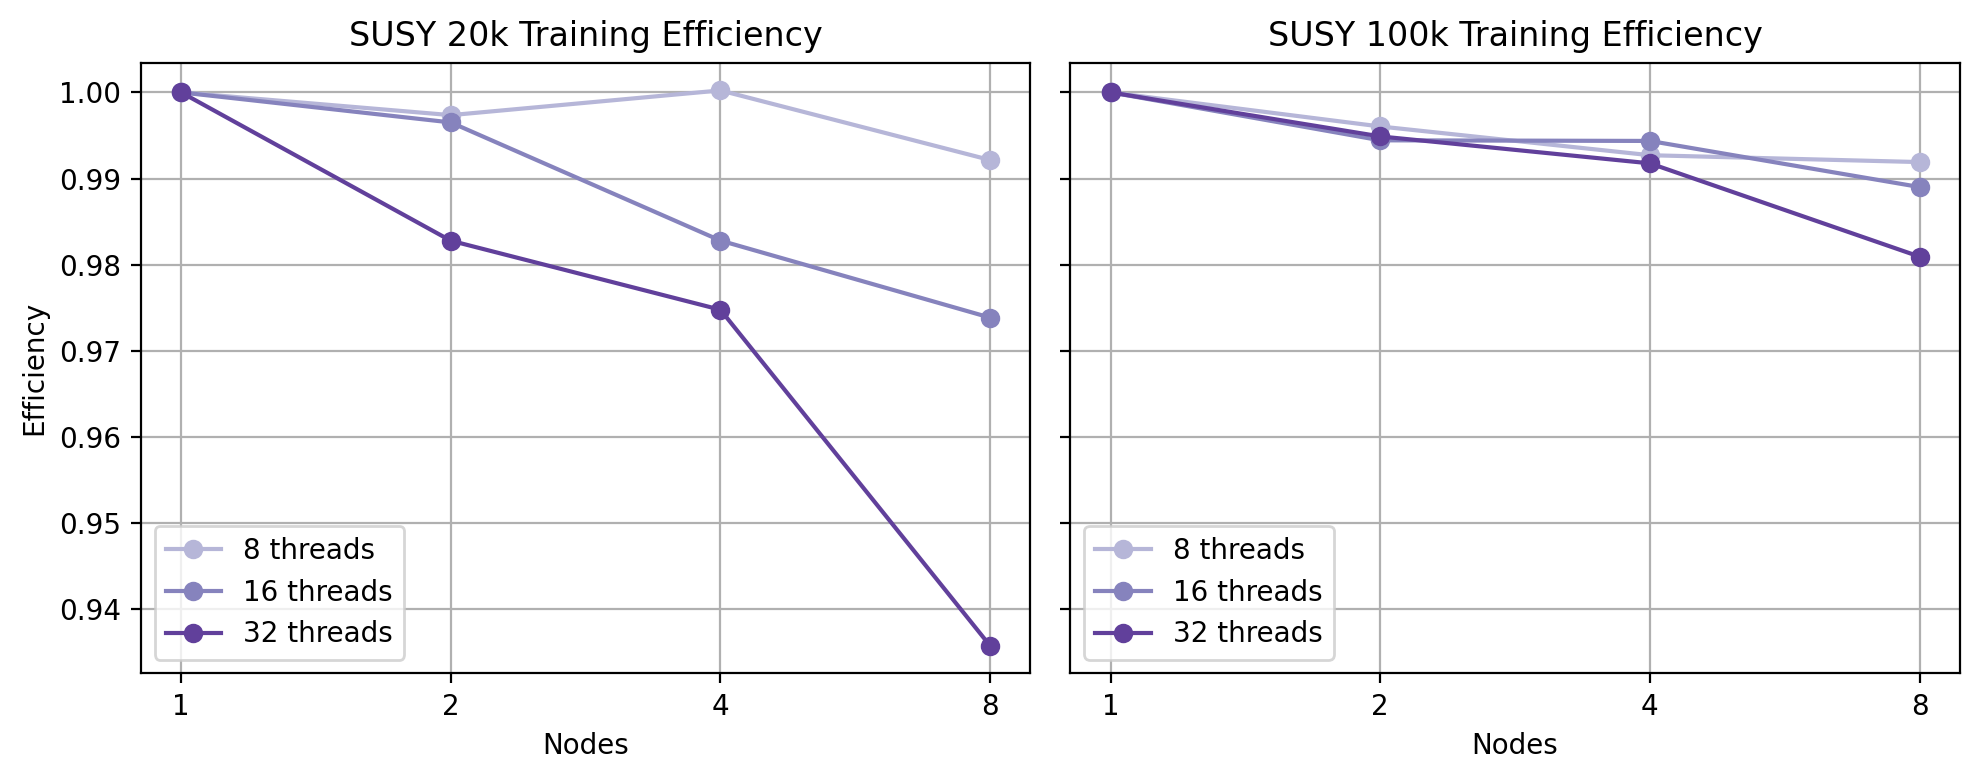

In [11]:
plot.training_efficiency(su)

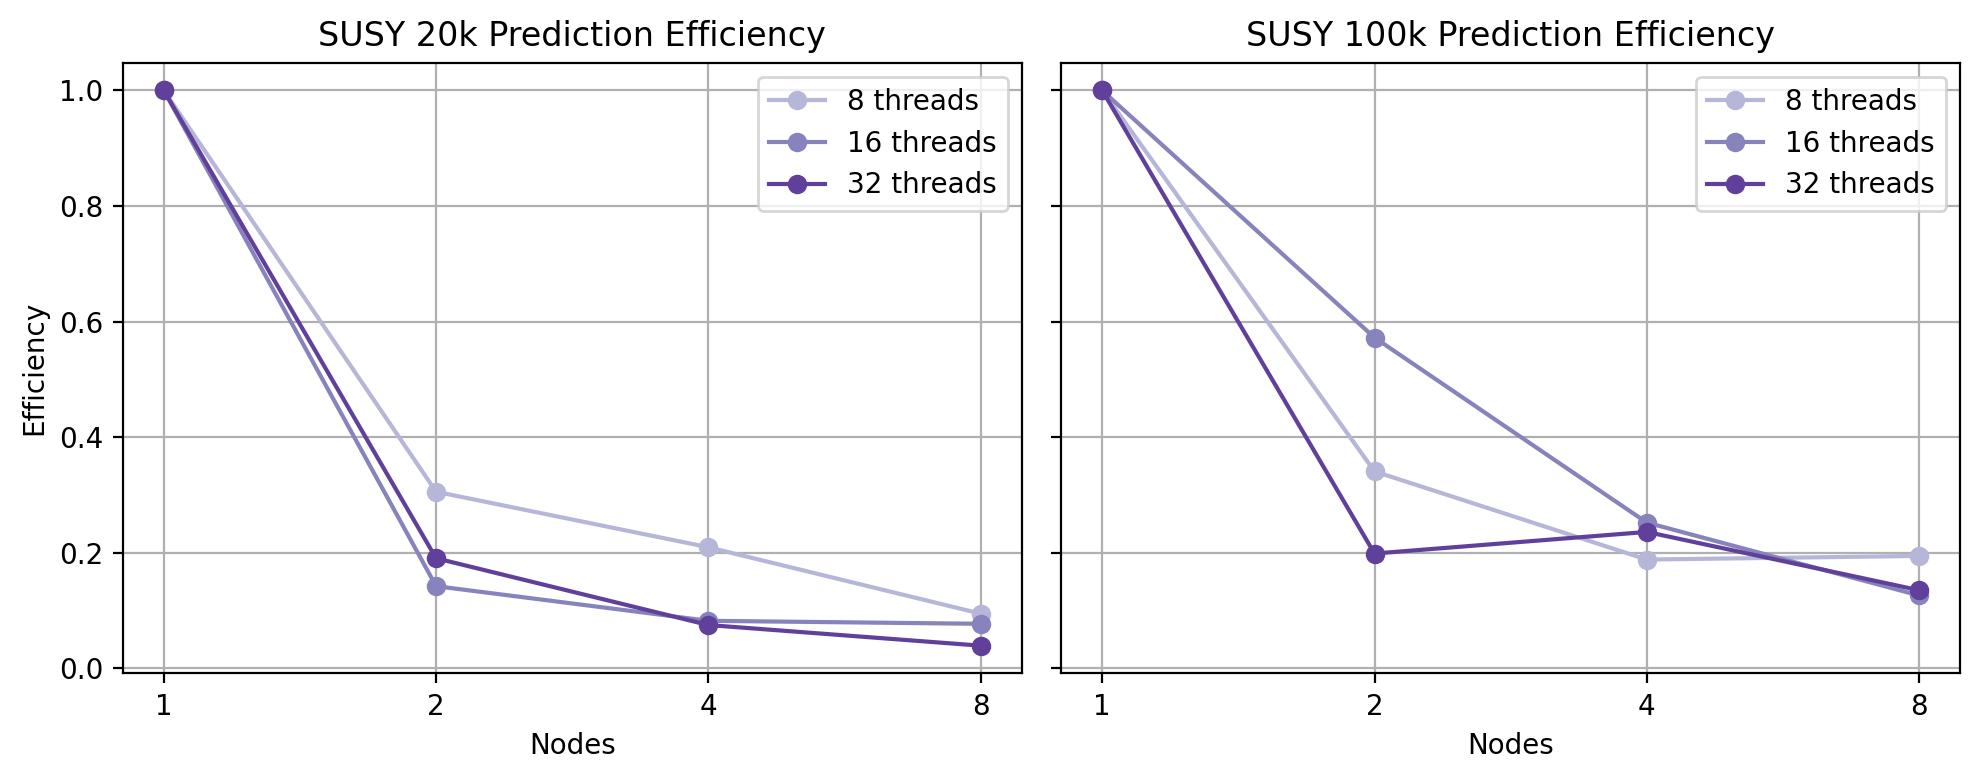

In [12]:
plot.prediction_efficiency(su)